In [60]:
# Libraries 

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
%matplotlib inline

In [61]:
# Reading the data

data1=pd.read_csv('dataset.csv')
data1

,ID,X1,X2,y
0,0,2.947814,6.626878,1
1,1,2.530388,7.785050,1
2,2,3.566991,5.651046,1
3,3,3.156983,5.467077,1
4,4,2.582346,4.457777,-1
5,5,2.155826,6.222343,-1
6,6,3.273418,3.520687,-1


In [62]:
# Training data

X1=data1['X1']
X2=data1['X2']
X_training=np.array(list(zip(X1,X2)))
X_training

array([[2.947814, 6.626878],
       [2.530388, 7.78505 ],
       [3.566991, 5.651046],
       [3.156983, 5.467077],
       [2.582346, 4.457777],
       [2.155826, 6.222343],
       [3.273418, 3.520687]])

In [63]:
# Training data - Y

y_training=data1['y']
y_training

0    1
1    1
2    1
3    1
4   -1
5   -1
6   -1
Name: y, dtype: int64

In [64]:
# target_names

target_names=['-1','+1']
target_names

['-1', '+1']

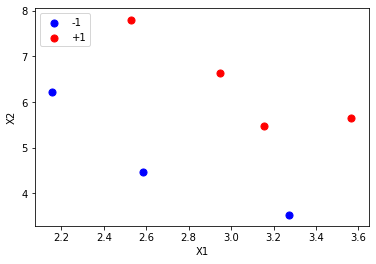

In [65]:
# Plotting the values

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)
plt.xlabel('X1')
plt.ylabel('X2');
plt.savefig('chart0.png')

# SVM Training

In [49]:
#Defining kernel

svc = svm.SVC(kernel='linear').fit(X_training,y_training)
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
#To view the internal model parameters use get_params() method.


svc.get_params(True)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [37]:
lbX1=math.floor(min(X_training[:,0]))-1
ubX1=math.ceil(max(X_training[:,0]))+1
lbX2=math.floor(min(X_training[:,1]))-1
ubX2=math.ceil(max(X_training[:,1]))+1
[lbX1,ubX1,lbX2,ubX2]


[1, 5, 2, 9]

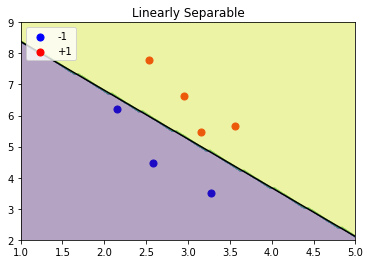

In [38]:
#The following plot show the margin and the support vectors


idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Linearly Separable')
plt.savefig('chart1.png')

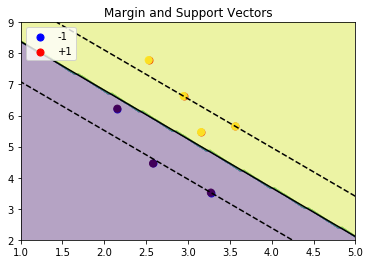

In [39]:
#The following plot show the margin and the support vectors


idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('Margin and Support Vectors')
plt.savefig('chart2.png')

# Training Performances

In [40]:
# normalize accuracy

svc.score(X_training, y_training)


1.0

In [66]:
# prediction - y

y_pred=svc.predict(X_training)
y_pred

array([ 1,  1,  1,  1, -1, -1, -1])

In [67]:
#y_training values

y_true = y_training
y_true

0    1
1    1
2    1
3    1
4   -1
5   -1
6   -1
Name: y, dtype: int64

In [68]:
# Calculating accuracy

metric.accuracy_score(y_true, y_pred, normalize=False)

7

### Confusion Matrix

In [69]:
# Defining confusion matrix

cnf_matrix=metric.confusion_matrix(y_true, y_pred)
cnf_matrix

array([[3, 0],
       [0, 4]])

Confusion matrix, without normalization
[[3 0]
 [0 4]]


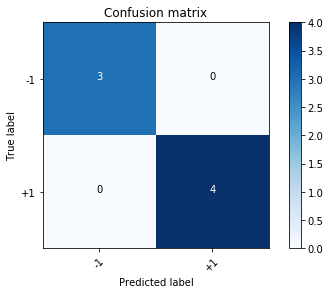

In [70]:
# Defining plot_confusion_matrix

import itertools

# code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
plt.show()

### SVM Prediction

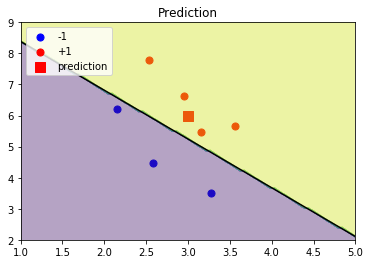

In [71]:
# Using SVM prediction

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.scatter(3,6,c='r',marker='s',s=90)
plt.legend(['-1','+1','prediction'],loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Prediction')
plt.savefig('chart3.png')

In [72]:
# Clearing the memory 
del X1, X2, X_training, y_training


Credits: https://people.revoledu.com/kardi/tutorial/Python/SVM+in+Python.html